# The big idea

Here, I am taking some of the code that I had written in `Prototyping final variable list.ipynb` and (1) copying the minimal reproducible code over to a python script, then (2) refactoring that code into reusable and composable functions.

In [10]:
%run ../prototype_of_variability_full_criteria.py

WSERV7:
  VLMS stars in our data: 103
  VLMS Q=2 stars: 70
  VLMS Q=2 variables (ignoring periodicity): 29
  VLMS Q=2 'almost' variables: 9
  VLMS Q=2 periodic: 23
  VLMS Q=2 variables (incl. periodics): 35

BDs:                103
BDs (Q=2):          70
Periodic BDs:       29
Periodic BDs (Q=2): 23
Variable BDs (Q=2): 29
  '' - periodics  : 12
Variable BDs (Q=1): 31
  '' - v2:          2
V0 BDs (Q=0):       10
Variable BDs (Q=1+2+per): 41



NGC 1333:
all_matches   186
lowmass       105
approved      103
statistical   69
color         68
6
70 29 31 29 23 6
47 103


/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [31]:
import warnings
warnings.filterwarnings("ignore")

In [50]:
%run ../prototype2_of_variability_full_criteria.py

WSERV5:
Ref: 330 (Stat: 211)
v2: 81 (81)
v1: 86 (84)
v_per: 78 (54)
v_subj: 16 (2)
138 330
v_total: 138 (100)
Statistical variability rate: 100/211 = 0.47
Statistical periodicity rate: 54/211 = 0.26

WSERV7:
Ref: 103 (Stat: 69)
v2: 29 (29)
v1: 31 (30)
v_per: 29 (24)
v_subj: 6 (0)
47 103
v_total: 47 (36)
Statistical variability rate: 36/69 = 0.52
Statistical periodicity rate: 24/69 = 0.35

WSERV8:
Ref: 225 (Stat: 181)
v2: 37 (37)
v1: 40 (39)
v_per: 25 (22)
v_subj: 6 (2)
59 225
v_total: 59 (51)
Statistical variability rate: 51/181 = 0.28
Statistical periodicity rate: 22/181 = 0.12



In [25]:
np.sum(new_v1 & new_ref), np.sum(new_v2 & new_ref), np.sum((new_v1 | new_v2) & new_ref)

(31, 29, 31)

In [28]:
np.sum(new_v_per & new_ref)

29

In [12]:

wserv_ids = [1, 5, 7, 8, 11]
n_obs_list = [130, 120, 171, 85, 110]

n_min_list = [60, 35, 80, 55, 65]
n_max_list = [100, 90, 160, 80, 100]

n_min_dict = {wserv: n_min for (wserv, n_min) in zip(wserv_ids, n_min_list)}

In [13]:
n_min_dict[7]

80

In [44]:
from wuvars.analysis.spectral_type_to_number import get_num_from_SpT, get_SpT_from_num

WSERV5:
Ref: 330
v2: 81
v1: 86
v_per: 78
v_subj: 16
138 330
WSERV7:
Ref: 103
v2: 29
v1: 31
v_per: 29
v_subj: 6
47 103
WSERV8:
Ref: 225
v2: 37
v1: 40
v_per: 25
v_subj: 6
59 225


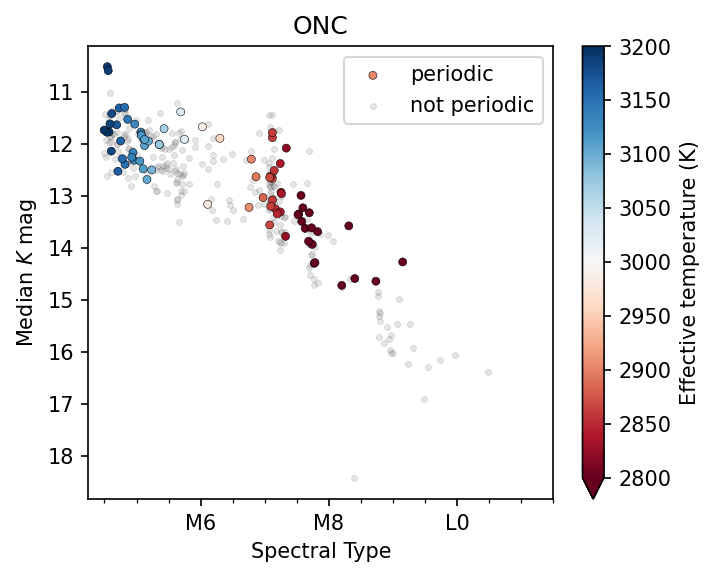

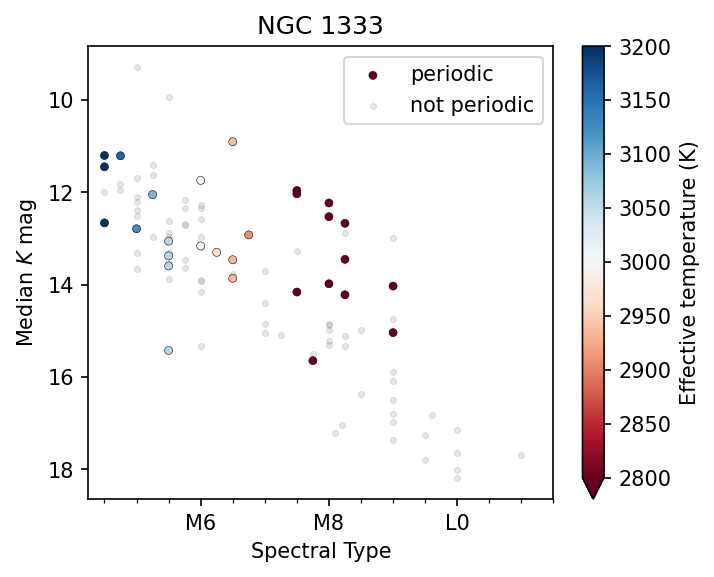

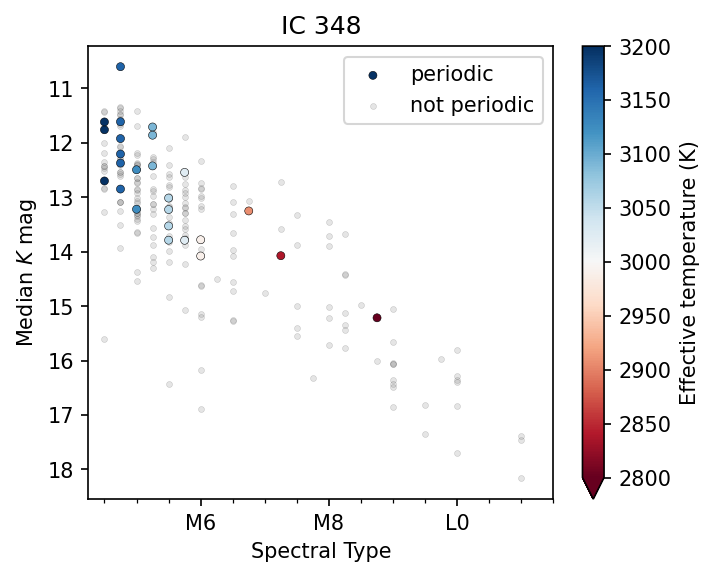

In [52]:
for wserv in [5, 7, 8]:

    print(f"WSERV{wserv}:")

    ref = select_targets(wserv)
    v2, v1 = select_stetson_variables(wserv)
    v_per = select_periodic_variables(wserv)
    v_subj = select_subjective_variables(wserv)

    print(f"Ref: {np.sum(ref)}")
    print(f"v2: {np.sum(ref & v2)}")
    print(f"v1: {np.sum(ref & v1)}")
    print(f"v_per: {np.sum(ref & v_per)}")
    print(f"v_subj: {np.sum(ref & v_subj)}")

    vv = select_variables(wserv)
    
    # plot stuff appears below
    
    x_match = reference_dict[wserv]
    ds = spread[f"wserv{wserv}"]
    
    x_crit = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & v_per])

    
    fig = plt.figure(figsize=(5,4), dpi=150)
    ax = fig.add_subplot(111)

    sc = ax.scatter(
        x_match.approved['SpT'][x_crit], 
        x_match.approved['median_KAPERMAG3'][x_crit], 
        s=15, 
        ec='k',
        linewidths=0.25,
        c=x_match.approved['Teff'][x_crit],
        cmap='RdBu',
        vmin=2800,
        vmax=3200,
        label='periodic',
        zorder=10
    )
    ax.scatter(
        x_match.approved['SpT'], 
        x_match.approved['median_KAPERMAG3'], 
#         marker='s',
        s=8, 
        ec='k',
        linewidths=0.25,
        c='0.5',
        alpha=0.2,
        label="not periodic",
        zorder=-10,
    )

    ax.invert_yaxis()    

    cbar = plt.colorbar(sc, extend='min')
    cbar.set_label("Effective temperature (K)")

    ax.set_xlim(4.25, 11.5)
    ax.set_xlabel("Spectral Type")
    ax.set_ylabel("Median $K$ mag")

    xticks = ax.get_xticks()
    xticks_minor = np.arange(4.5, 12, 0.5)
    ax.set_xticks(xticks_minor, minor=True)
    new_xtick_labels = [get_SpT_from_num(x)[:-2] for x in xticks]
    ax.set_xticklabels(new_xtick_labels)
    
    ax.set_title(full_names[wserv])

    plt.legend()
    

WSERV5:
Ref: 330
v2: 81
v1: 86
v_per: 78
v_subj: 16
138 330
WSERV7:
Ref: 103
v2: 29
v1: 31
v_per: 29
v_subj: 6
47 103
WSERV8:
Ref: 225
v2: 37
v1: 40
v_per: 25
v_subj: 6
59 225


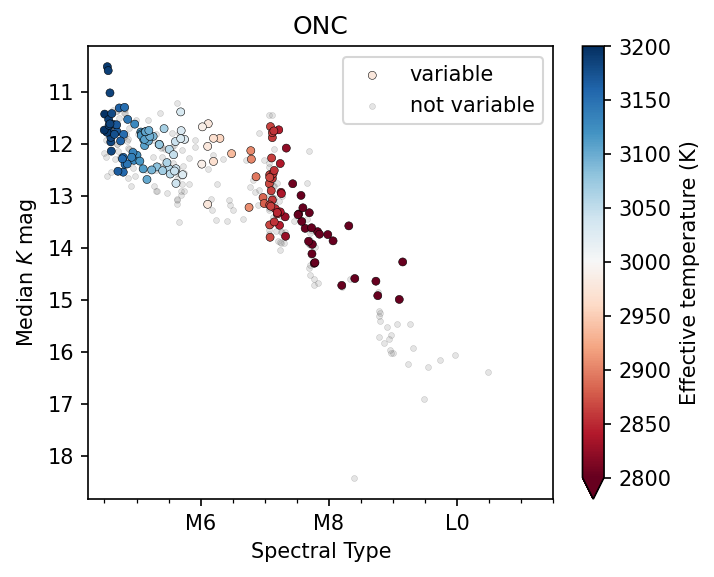

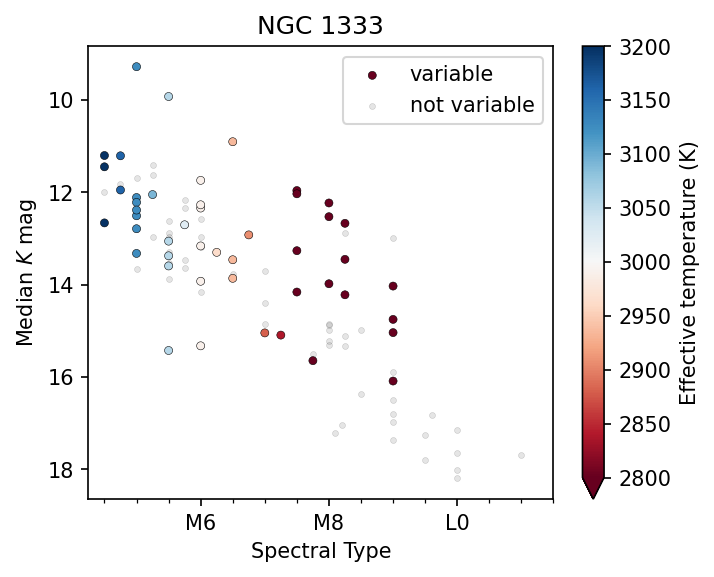

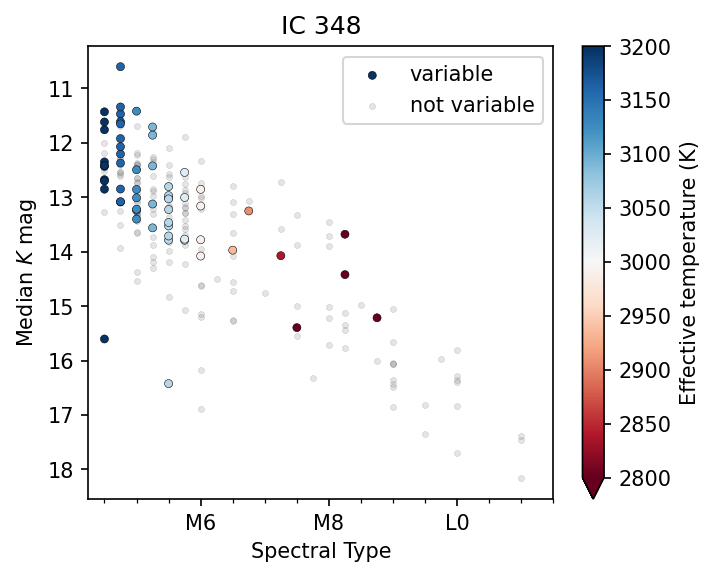

In [53]:
for wserv in [5, 7, 8]:

    print(f"WSERV{wserv}:")

    ref = select_targets(wserv)
    v2, v1 = select_stetson_variables(wserv)
    v_per = select_periodic_variables(wserv)
    v_subj = select_subjective_variables(wserv)

    print(f"Ref: {np.sum(ref)}")
    print(f"v2: {np.sum(ref & v2)}")
    print(f"v1: {np.sum(ref & v1)}")
    print(f"v_per: {np.sum(ref & v_per)}")
    print(f"v_subj: {np.sum(ref & v_subj)}")

    vv = select_variables(wserv)
    
    # plot stuff appears below
    
    x_match = reference_dict[wserv]
    ds = spread[f"wserv{wserv}"]
    
    x_crit = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & vv])

    
    fig = plt.figure(figsize=(5,4), dpi=150)
    ax = fig.add_subplot(111)

    sc = ax.scatter(
        x_match.approved['SpT'][x_crit], 
        x_match.approved['median_KAPERMAG3'][x_crit], 
        s=15, 
        ec='k',
        linewidths=0.25,
        c=x_match.approved['Teff'][x_crit],
        cmap='RdBu',
        vmin=2800,
        vmax=3200,
        label='variable',
        zorder=10
    )
    ax.scatter(
        x_match.approved['SpT'], 
        x_match.approved['median_KAPERMAG3'], 
#         marker='s',
        s=8, 
        ec='k',
        linewidths=0.25,
        c='0.5',
        alpha=0.2,
        label="not variable",
        zorder=-10,
    )

    ax.invert_yaxis()    

    cbar = plt.colorbar(sc, extend='min')
    cbar.set_label("Effective temperature (K)")

    ax.set_xlim(4.25, 11.5)
    ax.set_xlabel("Spectral Type")
    ax.set_ylabel("Median $K$ mag")

    xticks = ax.get_xticks()
    xticks_minor = np.arange(4.5, 12, 0.5)
    ax.set_xticks(xticks_minor, minor=True)
    new_xtick_labels = [get_SpT_from_num(x)[:-2] for x in xticks]
    ax.set_xticklabels(new_xtick_labels)
    
    ax.set_title(full_names[wserv])

    plt.legend()
    

WSERV5:
Ref: 330
v2: 81
v1: 86
v_per: 78
v_subj: 16
138 330
WSERV7:
Ref: 103
v2: 29
v1: 31
v_per: 29
v_subj: 6
47 103
WSERV8:
Ref: 225
v2: 37
v1: 40
v_per: 25
v_subj: 6
59 225


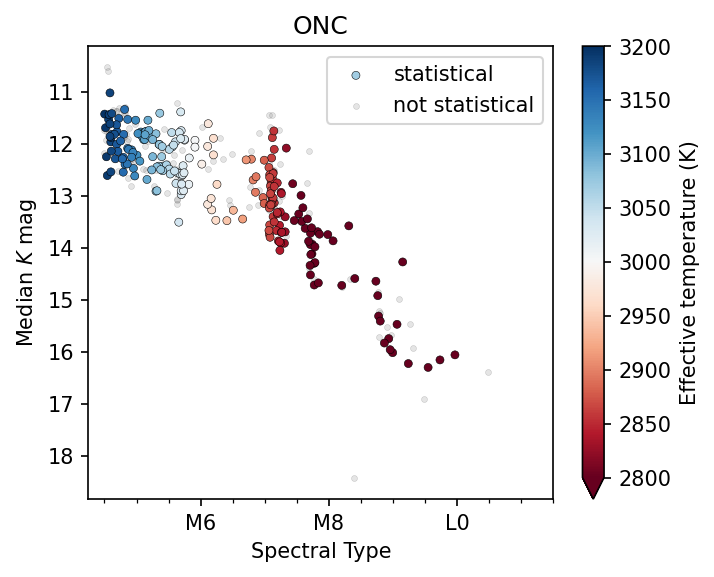

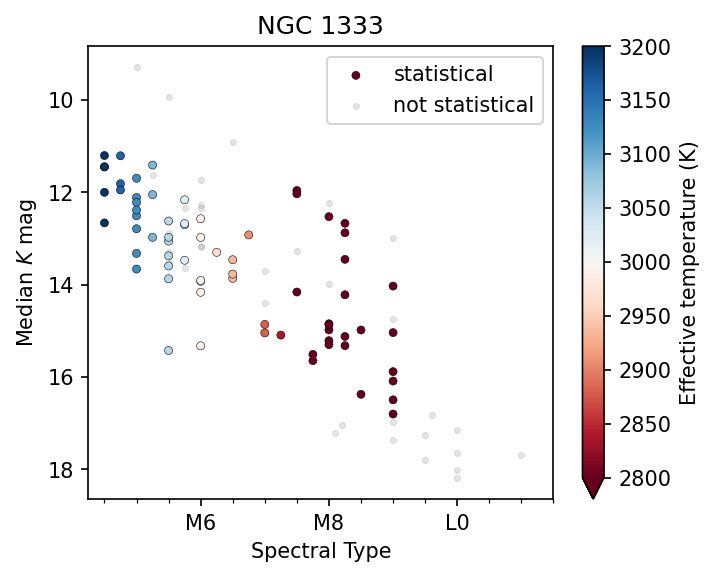

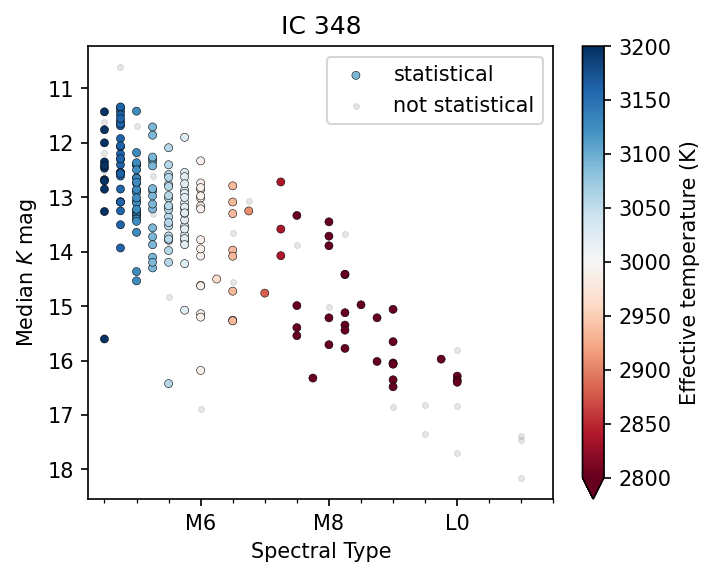

In [55]:
for wserv in [5, 7, 8]:

    print(f"WSERV{wserv}:")

    ref = select_targets(wserv)
    stat = select_targets(wserv, attr='statistical')    
    v2, v1 = select_stetson_variables(wserv)
    v_per = select_periodic_variables(wserv)
    v_subj = select_subjective_variables(wserv)

    print(f"Ref: {np.sum(ref)}")
    print(f"v2: {np.sum(ref & v2)}")
    print(f"v1: {np.sum(ref & v1)}")
    print(f"v_per: {np.sum(ref & v_per)}")
    print(f"v_subj: {np.sum(ref & v_subj)}")

    vv = select_variables(wserv)
    
    # plot stuff appears below
    
    x_match = reference_dict[wserv]
    ds = spread[f"wserv{wserv}"]
    
    x_crit = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & stat])

    
    fig = plt.figure(figsize=(5,4), dpi=150)
    ax = fig.add_subplot(111)

    sc = ax.scatter(
        x_match.approved['SpT'][x_crit], 
        x_match.approved['median_KAPERMAG3'][x_crit], 
        s=15, 
        ec='k',
        linewidths=0.25,
        c=x_match.approved['Teff'][x_crit],
        cmap='RdBu',
        vmin=2800,
        vmax=3200,
        label='statistical',
        zorder=10
    )
    ax.scatter(
        x_match.approved['SpT'], 
        x_match.approved['median_KAPERMAG3'], 
#         marker='s',
        s=8, 
        ec='k',
        linewidths=0.25,
        c='0.5',
        alpha=0.2,
        label="not statistical",
        zorder=-10,
    )

    ax.invert_yaxis()    

    cbar = plt.colorbar(sc, extend='min')
    cbar.set_label("Effective temperature (K)")

    ax.set_xlim(4.25, 11.5)
    ax.set_xlabel("Spectral Type")
    ax.set_ylabel("Median $K$ mag")

    xticks = ax.get_xticks()
    xticks_minor = np.arange(4.5, 12, 0.5)
    ax.set_xticks(xticks_minor, minor=True)
    new_xtick_labels = [get_SpT_from_num(x)[:-2] for x in xticks]
    ax.set_xticklabels(new_xtick_labels)
    
    ax.set_title(full_names[wserv])

    plt.legend()
    

In [56]:
138 + 47 + 59

244

In [57]:
225 + 103 + 330

658

In [61]:
len(onc_match.lowmass) + len(ngc_match.lowmass) + len(ic_match.lowmass)

733

In [62]:
# I'm trying a sketch I made. It drops the colormapping in favor of another approach.

WSERV5:
Ref: 330
v2: 81
v1: 86
v_per: 78
v_subj: 16
138 330
WSERV7:
Ref: 103
v2: 29
v1: 31
v_per: 29
v_subj: 6
47 103
WSERV8:
Ref: 225
v2: 37
v1: 40
v_per: 25
v_subj: 6
59 225


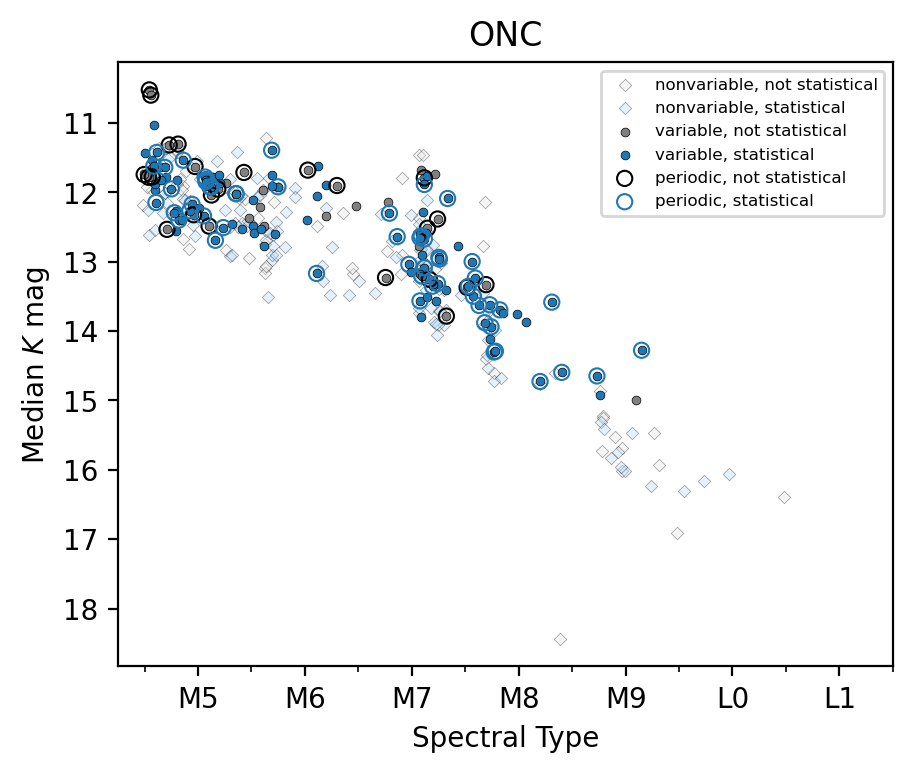

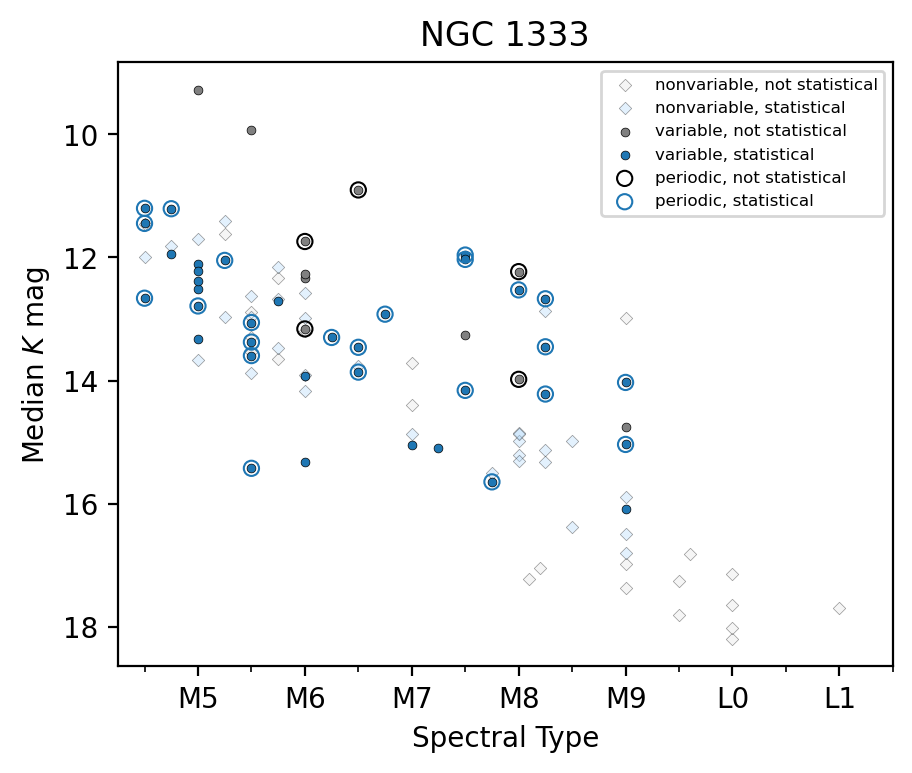

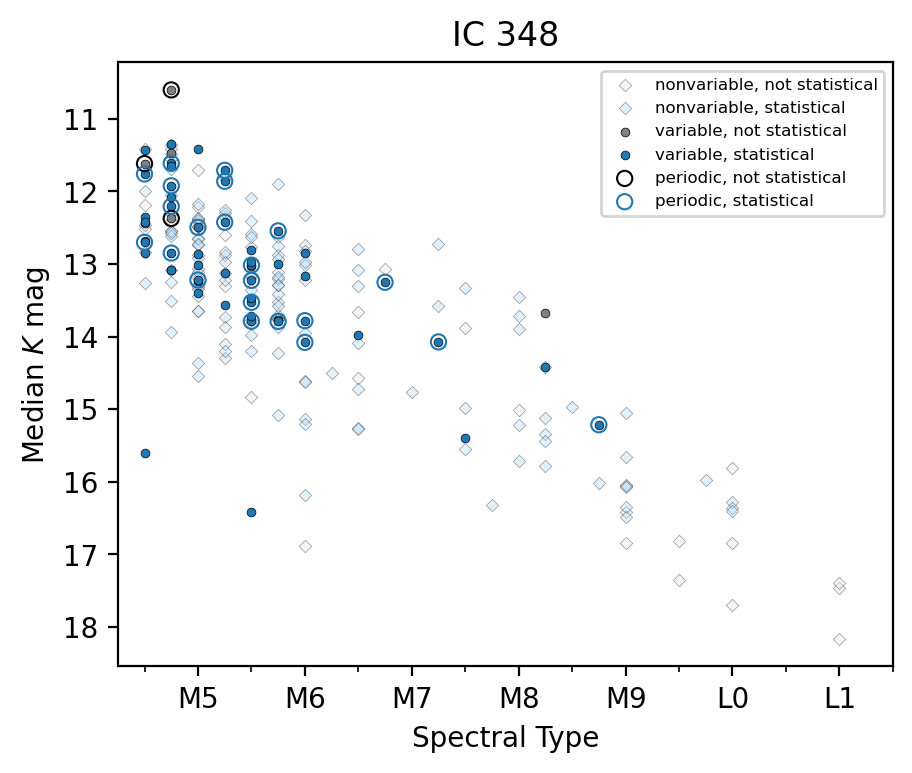

In [100]:
for wserv in [5, 7, 8]:

    print(f"WSERV{wserv}:")

    ref = select_targets(wserv)
    stat = select_targets(wserv, attr='statistical')    
    v2, v1 = select_stetson_variables(wserv)
    v_per = select_periodic_variables(wserv)
    v_subj = select_subjective_variables(wserv)

    print(f"Ref: {np.sum(ref)}")
    print(f"v2: {np.sum(ref & v2)}")
    print(f"v1: {np.sum(ref & v1)}")
    print(f"v_per: {np.sum(ref & v_per)}")
    print(f"v_subj: {np.sum(ref & v_subj)}")

    vv = select_variables(wserv)
    
    # plot stuff appears below
    
    x_match = reference_dict[wserv]
    ds = spread[f"wserv{wserv}"]
    
    x_crit = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & stat])
    
    nonvar = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & ~stat & ~vv])
    nonvar_stat = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & stat & ~vv])
    var = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & vv & ~stat])
    var_stat = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & vv & stat])
    per = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & v_per & ~stat])
    per_stat = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & v_per & stat])

    
    fig = plt.figure(figsize=(5,4), dpi=200)
    ax = fig.add_subplot(111)

    ax.scatter(
        x_match.approved['SpT'][nonvar], 
        x_match.approved['median_KAPERMAG3'][nonvar], 
        marker='D',
        s=10, 
        linewidths=0.25,
        c='0.9',
        ec='k',
        label='nonvariable, not statistical',
        alpha=0.4,
    )
    ax.scatter(
        x_match.approved['SpT'][nonvar_stat], 
        x_match.approved['median_KAPERMAG3'][nonvar_stat], 
        marker='D',
        s=10, 
        linewidths=0.25,
        c='#bbdefb',
        ec='k',
        label='nonvariable, statistical',
        alpha=0.4,
    )
    ax.scatter(
        x_match.approved['SpT'][var], 
        x_match.approved['median_KAPERMAG3'][var], 
        s=10, 
        linewidths=0.25,
        c='0.5',
        ec='k',
        label='variable, not statistical'
    )
    ax.scatter(
        x_match.approved['SpT'][var_stat], 
        x_match.approved['median_KAPERMAG3'][var_stat], 

        s=10, 
        linewidths=0.25,
        c='C0',
        ec='k',
        label='variable, statistical'
    )
    ax.scatter(
        x_match.approved['SpT'][per], 
        x_match.approved['median_KAPERMAG3'][per], 
        s=30, 
        linewidths=0.75,
        facecolor='None',
        ec='k',
        label='periodic, not statistical'
    )
    ax.scatter(
        x_match.approved['SpT'][per_stat], 
        x_match.approved['median_KAPERMAG3'][per_stat], 
        s=30, 
        linewidths=0.75,
        facecolor='None',
        ec='C0',
        label='periodic, statistical'
    )
    
    ax.invert_yaxis()

    ax.set_xlim(4.25, 11.5)
    ax.set_xlabel("Spectral Type")
    ax.set_ylabel("Median $K$ mag")

    xticks = ax.get_xticks()
    xticks_minor = np.arange(4.5, 12, 0.5)
    ax.set_xticks(xticks_minor, minor=True)
    new_xtick_labels = [get_SpT_from_num(x)[:-2] for x in xticks]
    ax.set_xticklabels(new_xtick_labels)
    
    ax.set_title(full_names[wserv])
    plt.legend(fontsize=6)
    plt.savefig(f"randomtitle_{short_names[wserv]}.pdf")
    
